In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
import numpy as np
import cv2
import plotly
import os
from utils import *
path = '../Imagens/'
plt.rcParams['image.cmap'] = 'gray' # Para mostrar as imagens em escala de cinza
plt.rcParams["figure.dpi"] = 100 

In [8]:
def imshow(img):
    cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

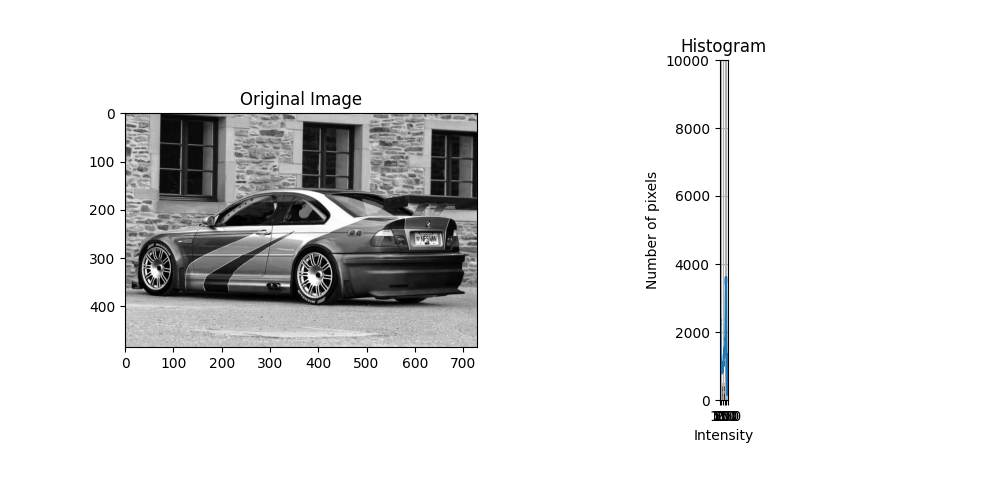

In [9]:
imfile = 'm3gtr.jpg'
img_gray = cv2.imread(os.path.join(path, imfile), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.show()

In [10]:
def nothing(x):
   pass

### Subtrair um escalar

0

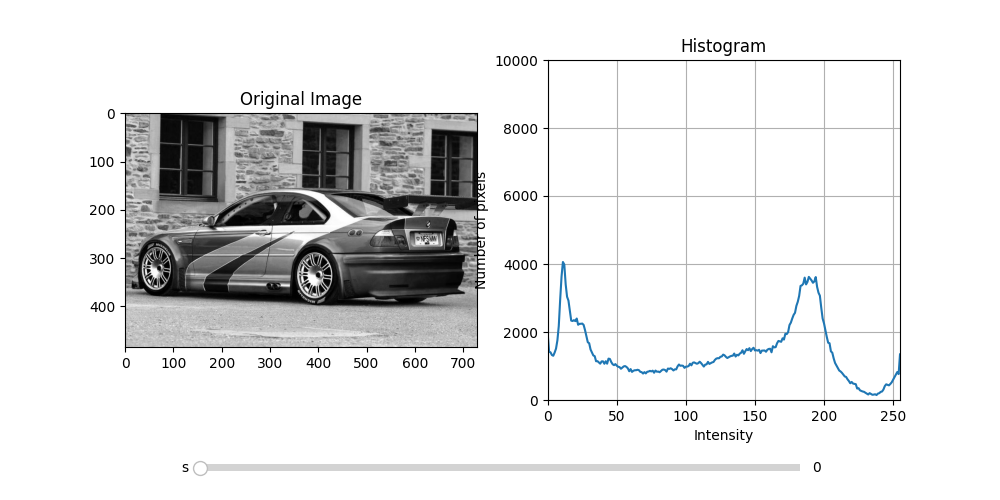

In [12]:
%matplotlib widget
#ou %matplotlib notebook
from matplotlib.widgets import Slider

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(bottom=0.2)

# Display the original image
im = ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original Image')
s = 0
# Display the histogram
h = cv2.calcHist([img_gray],[0],None,[256],[0,256])
line, = ax2.plot(h)
ax2.set_xlim([0, 255])
ax2.set_ylim([0, 10000])
ax2.set_title('Histogram')
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Number of pixels')
ax2.set_xticks(np.arange(0, 256, 50))
ax2.grid(True)
sliders = Slider(ax=fig.add_axes([0.2, 0.05, 0.6, 0.03]), label='s', valmin=0, valmax=255, valinit=s, valstep=1)


def update(val):
    s = sliders.val
    im_sub = img_gray - s
    im.set_data(im_sub)
    h = cv2.calcHist([im_sub],[0],None,[256],[0,256])
    line.set_ydata(h)
    fig.canvas.draw_idle()

sliders.on_changed(update)
